In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
# Save reference to the `fashion_mnist` dataset from the keras library
fashion_mnist = keras.datasets.fashion_mnist

# Separate the `fashion_mnist` data into machine learning training data and test data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Classification names for clothing in images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# See the length of the array and the dimensions of each image of the training images
train_images.shape

(60000, 28, 28)

In [6]:
# See the length of the array of training labels
len(train_labels)

60000

In [7]:
# Each label is a number between 0 and 9 because of these numbers maps to an index of the clothing class names
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# See the length of the array and the dimensions of each image the of the test images
test_images.shape

(10000, 28, 28)

In [9]:
# See the length of the array of test labels
len(test_labels)

10000

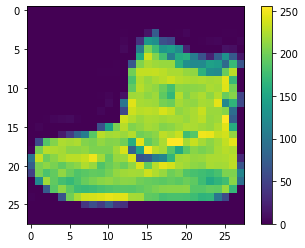

In [10]:
# Make a Matplotlib plot figure
plt.figure()

# Show the training image at index 0 in the plot figure
plt.imshow(train_images[0])

# Add a color scale along side the figure
plt.colorbar()

# Don't show grids over the figure
plt.grid(False)

# Render the figure
plt.show()

In [11]:
# Grayscale all images
# Reassign each pixel color of each training and test image to a number between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

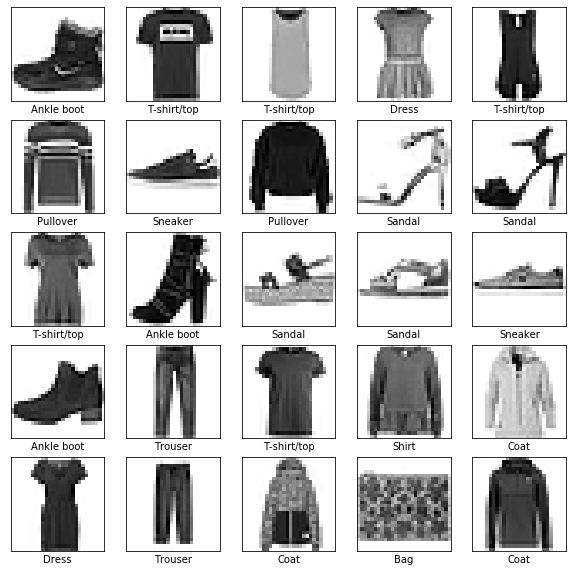

In [12]:
# Make a new plt figure
plt.figure(figsize=(10,10))

# Do 25 times
for i in range(25):
    plt.subplot(5, 5, i + 1)
    
    # Remove ticks on x-axis and y-axis
    plt.xticks([])
    plt.yticks([])
    
    # Remove grid from each subplot
    plt.grid(False)
    
    # Add training image at index i to subplot
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    # Add x-axis label to image in subplot
    plt.xlabel(class_names[train_labels[i]])
    
# Render figure
plt.show()

In [13]:
# Make a model of layers which do learning for meachine learning
# First, flatten images to 1-dimensional
# Second, make 128 nodes (or neurons) used for learning
# Third, make 10 nodes which each have the probability one of the images belongs to one of the 10 classes
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
# Compile the model for use
# The loss, determines how accurate the model is during learning
# The optimizer, updates the model with data seen and the loss function
# The metrics, monitor training and test steps for accuracy
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
# Fit the model to the training data 10 times
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4972 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3734 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3377 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3142 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2964 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2822 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2717 - accuracy: 0.8990
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2605 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2510 - accuracy: 0.9063
Epoch 10/10
60

In [16]:
# Evaluate the accuracy of the machine learning model verbosely
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy as a probability
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2781 - accuracy: 0.8879

Test accuracy: 0.8879


In [17]:
# Make predictions about the classification of images in the test images
predictions = model.predict(test_images)

# See the list of confidences each image fits a classification
print(predictions[0])

# See the highest confidence of a prediction
print(np.argmax(predictions[0]))

# Check the test label matches the prediction
print(test_labels[0])

[1.4480763e-06 7.1811046e-10 1.8160009e-09 1.9601093e-11 1.2387176e-08
 2.3658697e-03 2.9105104e-08 1.4464465e-02 5.0872995e-07 9.8316771e-01]
9
9


In [18]:
def plot_image(i, predictions_array, true_label, img):
    """Show the image of the clothing"""
    
    # Make references to the true label and image at a given index
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]

    # Arrange the plot to look as wanted
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Show the image in the plot
    plt.imshow(img, cmap=plt.cm.binary)
    
    # Make a label color red when the predicted label isn't the true label
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    # Write the x-axis label for the image with predicted label, confidence as a probability and true label with the correct-guess color label
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    """Show the clothing classification prediction confidences as probabilities in a histogram"""
    
    # Make reference to the true label for a prediction at a given index
    predictions_array, true_label = predictions_array, true_label[i]

    # Set basic plot looks
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    # The plot is a 10 bar histogram of the clothing classification predictions
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    
    # The range is between 0 and 1 because probabilities are being plotted
    plt.ylim([0, 1])
    
    # The classifcation label index with the highest confidence prediction
    predicted_label = np.argmax(predictions_array)
    
    # The predicted and true labels should be colored
    # With high accuracy of predictions few bars of histograms should be red
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

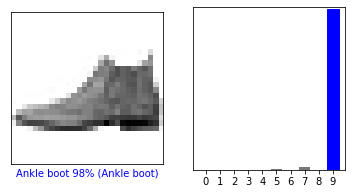

In [19]:
# Choose an index
i = 0

# Make a plot figure
plt.figure(figsize=(6, 3))

# Make a subplot for the figure and plot the clothing image and prediction with correct-guess color
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

# Make a subplot for the figure and plot the confidence predictions with correct-guess color for the prediction with the largest confidence
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

# Plot the figure
plt.show()

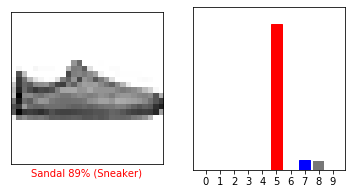

In [20]:
# Choose an index
i = 12

# Make a plot figure with size
plt.figure(figsize=(6, 3))

# Make subplot of the figure and plot the image with correct prediction
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

# Make subplot of the figure and plot the correct confidence predictions
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

# Plot the figure
plt.show()

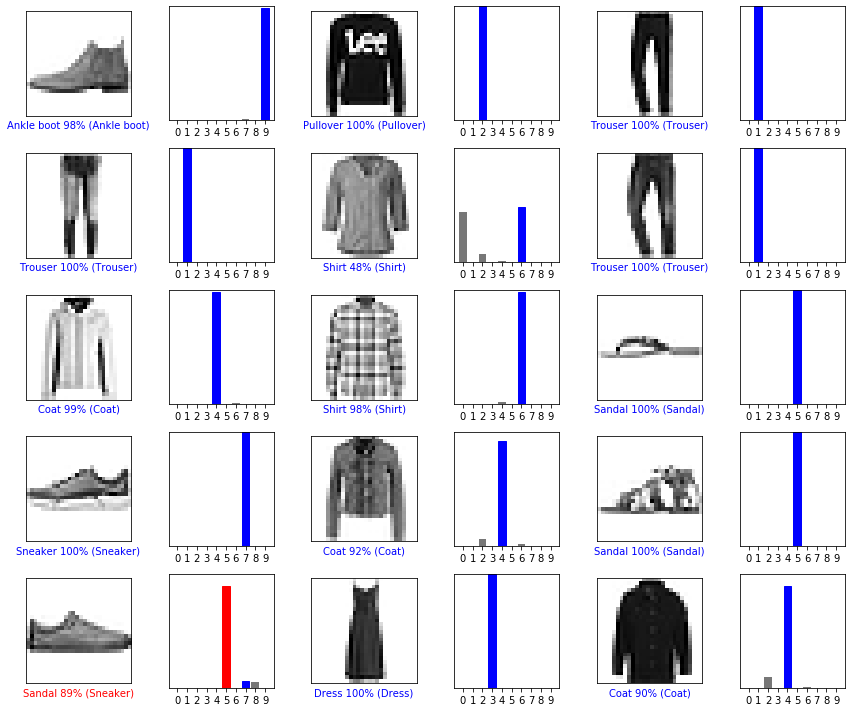

In [21]:
# Make a plot figure with size
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Plot a number of images
for i in range(num_images):
    
    # Make a subplot of the figure and plot the clothing image with correct prediction
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    
    # Make a subplot of the figure and plot the correct confidence predictions
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
# Make ready and show the figure
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[1.2153575e-06 4.1224667e-12 9.9924845e-01 6.9694095e-10 5.3637056e-04
  3.2609885e-13 2.1395995e-04 8.8079478e-16 2.2362968e-10 9.7054634e-16]]
2


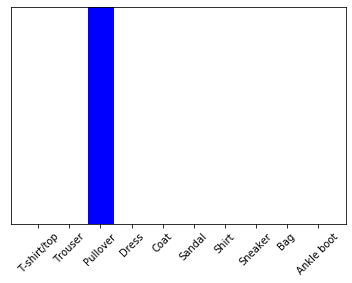

In [22]:
# Choose and show information about the test image at index 1
img = test_images[1]
print(img.shape)

# Make a list where the choice image is the only element
img = (np.expand_dims(img, 0))
print(img.shape)

# Use the machine learning model to predict the clothing classification of the single clothing
predictions_single = model.predict(img)
print(predictions_single)

# Plot the correct confidence predictions along with x-axis tick labels
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# Show the index of the class name which has the highest confidence prediction
print(np.argmax(predictions_single[0]))

In [ ]:
# 